In [23]:
import csv
import pandas as pd

import requests
import os


 ## Identify one or more suitable web APIs 

***<font color=red size=4>API Chosen:</font>***

<font color=black size=3>Here I chose the API describing the beer data: https://punkapi.com/documentation/v2 </font>

<font color=black size=3>First of all, the API data is composed of JSON format, which is very clear, easy to understand the meaning of the data, and then the data is very comprehensive, which is convenient for me to select and analyze the data feature to show the diversity.</font>

<font color=black size=3>The API constructs URLs in a simple and diverse way to meet a variety of data needs. Also, this is an open free API and no API key.</font>

## Collect data your chosen API(s)

***<font color=red size=4>Collecting Raw Data:</font>***

<font color=black size=3>There are two functions created to collect the raw data. One to create a CSV file that stores the raw data, and one to write the headers to the CSV file.</font> 

In [24]:
#Write the header information to the CSV file
import json
import requests
headers = {'User - Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.75 Mobile Safari/537.36',}
def create_file (file_loc, headings):
    with open(file_loc, "w",newline='') as write_file: #as in get_and_write_data function         
        f = csv.writer(write_file)        
        f.writerow(headings)    
        write_file.close()
#A function that reads a page of data
def get_and_write_data(link, file_loc):
    response = requests.get(link,headers=headers)
    html_content = response.text
    html_content=json.loads(html_content)
#     print(type(html_content))
    with open(file_loc, "a",newline='') as write_file:
        writer=csv.writer(write_file)
        for html in html_content:  
            id=html['id']
            first_brewed=html['first_brewed'] #The date of the first brew.
            abv=html['abv'] #Alcohol By Volume
            ibu=html['ibu'] #IBU (International Bitterness Units) is another common measurement for beer. 
            target_fg=html['target_fg'] #Final Gravity
            target_og=html['target_og'] #Original Gravity
            ebc=html['ebc'] #European Brewery Convention
            srm=html['srm'] #Standard Reference Method, refers to a system used to specify beer color intensity.
            ph=html['ph'] 
            attenuation_level=html['attenuation_level'] #A measure of the percentage of 
                                                 #sugar converted to alcohol and carbon dioxide during fermentation.
            volume_value=html['volume']['value']
            volume_unit=html['volume']['unit']
            one_line=[id,first_brewed,abv,ibu,target_fg,target_og,ebc,srm,ph,attenuation_level,volume_value,volume_unit]
            writer.writerow(one_line)
# linkq="https://api.punkapi.com/v2/beers?page=1&per_page=80"
# get_and_write_data(linkq,'a.csv')

## Parse the collected data, and store it in an appropriate file format 

In [25]:
file_path='original_data.csv'
headstr=['id','first_brewed','abv','ibu','target_fg','target_og','ebc','srm','ph','attenuation_level','volume_value','volume_unit']
create_file (file_path, headstr)
print("Begin Raw Data Collection ")
for i in range(1,8):#Collect all the data, which is 321
    print("page is ",i)
    link='https://api.punkapi.com/v2/beers?page='+str(i)+'&per_page=50'#Reading 50 pieces of data per page.
    get_and_write_data(link,file_path)
print("Raw Data Collection Completed ")

Begin Raw Data Collection 
page is  1
page is  2
page is  3
page is  4
page is  5
page is  6
page is  7
Raw Data Collection Completed 


## Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

***<font color=red size=4>Parsing Raw Data:</font>***

<font color=black size=3>Read out all the data stored in the original CSV file.</font>

<font color=black size=3>First, convert the date into a fixed format, such as 2017-12, then convert all the data that can be converted into a floating point for subsequent graph analysis, and then the unified unit, and to eliminate null values.</font>

In [26]:
import re
deal_data_path='clean_data.csv'
clean_headstr=['id','first_brewed','abv','ibu','target_fg','target_og','ebc','srm','ph','attenuation_level']
create_file(deal_data_path,clean_headstr)
with open('original_data.csv','r',encoding='utf-8') as csvfile:
    flag=0
    reader=csv.reader(csvfile)
    for row in reader:
        if row[1]=='first_brewed':
            continue
        if row[8]=='':
            continue
        if float(row[8])>7:
            continue
            
        for x in row:
            if x=='':
                flag=1
        if flag==1:
            print(row[0])
            flag=0
            continue
#         print(row[1])
        try:
#             print("this",row[1])
            result=re.match(r'(.*)/(.*)',row[1])
            year=result.group(2)
            row[1]=year+'-'+result.group(1)
#             print("this",row[1])
        except:
            pass
#         print(row[1])
        one_data=[row[0],row[1],float(row[2]),float(row[3]),float(row[4]),float(row[5]),float(row[6]),float(row[7]),float(row[8]),float(row[9])]
        with open(deal_data_path,"a",newline='') as daily:
            df = csv.writer(daily)
            df.writerow(one_data)
#             print(one_data)
            daily.close()
                
                

19
24
35
130
149
235
236
237


* <font color=black size=3>Utilizing Pandas' third-party library to format this data for later analysis.</font>

In [27]:
analyze_data= pd.read_csv(deal_data_path)
pd.options.mode.chained_assignment = None 
analyze_data['first_brewed'] = pd.to_datetime(analyze_data['first_brewed'])
simplified_data = analyze_data[['id','first_brewed','abv','ibu','target_fg','target_og','ebc','srm','ph','attenuation_level']]
simplified_data = simplified_data.sort_values(by=['first_brewed'])

In [28]:
analyze_data[0:10]

,id,first_brewed,abv,ibu,target_fg,target_og,ebc,srm,ph,attenuation_level
0,1,2007-09-01,4.5,60.0,1010.0,1044.0,20.0,10.0,4.4,75.0
1,2,2008-04-01,4.1,41.5,1010.0,1041.7,15.0,15.0,4.4,76.0
2,3,2015-11-01,4.2,8.0,1007.0,1040.0,8.0,4.0,3.2,83.0
3,4,2013-09-01,6.3,55.0,1012.0,1060.0,30.0,15.0,4.4,80.0
4,5,2011-02-01,7.2,59.0,1027.0,1069.0,10.0,5.0,4.4,67.0
5,6,2013-05-01,5.2,38.0,1005.0,1045.0,15.0,7.5,4.4,88.9
6,7,2012-07-01,11.2,35.0,1017.0,1108.0,80.0,40.0,5.3,84.0
7,8,2013-03-01,4.7,40.0,1010.0,1046.0,12.0,6.0,4.4,78.0
8,9,2010-03-01,12.5,30.0,1020.0,1106.0,84.0,42.0,5.6,83.0
9,10,2011-01-01,7.5,75.0,1013.0,1068.0,22.0,11.0,4.4,80.9


In [29]:
simplified_data.isnull().sum() #Check the number of null values.

id                   0
first_brewed         0
abv                  0
ibu                  0
target_fg            0
target_og            0
ebc                  0
srm                  0
ph                   0
attenuation_level    0
dtype: int64

In [30]:
simplified_data.dtypes.value_counts() 

float64           8
datetime64[ns]    1
int64             1
dtype: int64

## Analyse and summarise the cleaned dataset 

In [31]:
print("\nSimplified_data columnns:\n" + str(simplified_data.columns) + "\n")
print("Simplified_data Descriptive Stats:\n")
print(simplified_data.describe()) 


Simplified_data columnns:
Index(['id', 'first_brewed', 'abv', 'ibu', 'target_fg', 'target_og', 'ebc',
       'srm', 'ph', 'attenuation_level'],
      dtype='object')

Simplified_data Descriptive Stats:

               id         abv          ibu    target_fg    target_og  \
count  314.000000  314.000000   314.000000   314.000000   314.000000   
mean   163.716561    7.746178    65.449045  1015.308917  1067.251274   
std     93.591898    3.901523    93.025026    14.672248    27.122758   
min      1.000000    0.500000     0.000000  1000.000000  1007.000000   
25%     83.250000    5.200000    35.000000  1010.000000  1048.125000   
50%    163.500000    7.200000    50.000000  1012.000000  1065.000000   
75%    245.750000    9.000000    70.000000  1015.000000  1078.750000   
max    325.000000   41.000000  1157.000000  1125.000000  1157.000000   

              ebc         srm          ph  attenuation_level  
count  314.000000  314.000000  314.000000         314.000000  
mean    66.783121   3

***<font color=red size=4>Matplotlib and Pandas Graphing:</font>***

In [32]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

* <font color=black size=3>Histogram: Observe the size change of target_og and target_fg.</font>

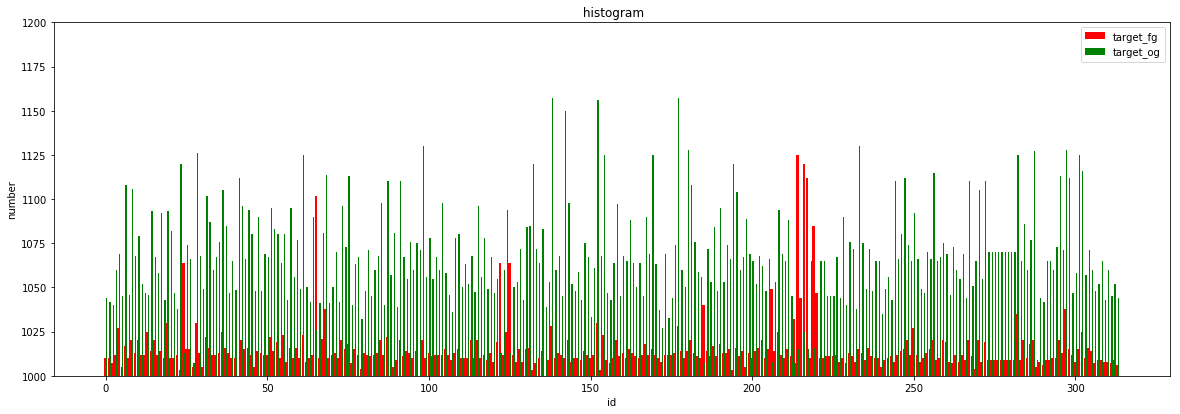

In [33]:
# print(simplified_data['id'][2])
plt.figure(figsize=(20, 6.5))
x_list=sorted(list(simplified_data['id']))
# label_list = ['2014', '2015', '2016', '2017']  
num_list1 = [simplified_data['target_fg'][i] for i in range(len(x_list))]   # Ordinate values: target_fg
# a = [i for i in range(10)]
x = range(len(num_list1))
num_list2 = [simplified_data['target_og'][i] for i in range(len(x_list))]   # Ordinate values: target_og
rects1 = plt.bar(x,height=num_list1, color='red', label="target_fg")
rects2 = plt.bar([i + 0.3 for i in x], height=num_list2, width=0.4, color='green', label="target_og")
plt.ylim(1000, 1200)     # The Y-axis range
plt.ylabel("number")
# plt.xticks([index + 0.2 for index in x], x_list)
plt.xlabel("id")
plt.title(" histogram")
plt.legend()     # Set the captions
plt.show()

<font color=black size=3>The original gravity (OG) measures the sugar content of the wort before fermentation. The final gravity (FG) is the amount of sugar remaining after the fermentation process. Different styles of beer, these numbers need to be in different ranges.
    (source: https://www.brewersfriend.com/2017/05/07/beer-styles-original-gravity-and-final-gravity-chart-2017-update/)

FG is always smaller than OG. Because sugar is converted to alcohol and carbon dioxide during the fermentation process, the specific gravity is reduced. Some sugar disappears, and then the density of alcohol is naturally lower than water.
(source: https://www.boxbrewkits.com/blogs/news/16337216-5-abbreviations-brewers-use-that-everyday-beer-drinkers-should-know)

But from the figure above we can find that there are some beers whose fg is greater than og, which means the beer has a low degree of fermentation and more sweetness.
The size difference between og and fg can also be used to calculate how much alcohol is in the beer. Therefore, consumers and dealers can choose the beer they need based on the comparison between the two parameters. Manufacturers can also judge the quality of brewed beer based on these data.
</font>

* <font color=black size=3>Scatter diagram: Observe the outliers.</font>

<font color=black size=3>The purpose of observing outliers here is to find out the data that deviates from most of the data in the dataset, to explore the reasons, and to suspect that the deviation of these data is not caused by random factors, but by completely different mechanisms, so as to improve beer brewing skills.</font>

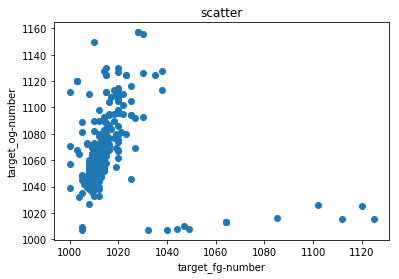

In [34]:
plt.scatter(num_list1,num_list2)
plt.show
plt.ylabel("target_og-number")
# plt.xticks([index + 0.2 for index in x], x_list)
plt.xlabel("target_fg-number")
plt.title("scatter")
# plt.legend()     # Set the captions
plt.show()


* <font color=black size=3>Line chart: Observe the distribution of fg and og for different types of beer.

Text(0.5, 1.0, 'line_chart')

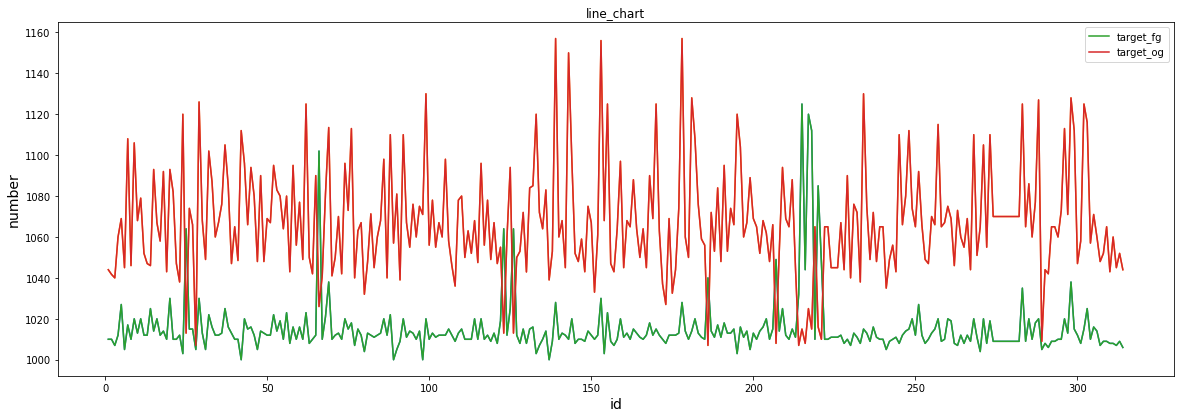

In [35]:
plt.figure(figsize=(20, 6.5))
plt.title("id", fontsize=24)
plt.xlabel(u"x", fontsize=14)
plt.ylabel(u"y", fontsize=14)
x = range(1,len(num_list1)+1)
y1 = num_list1
y2 = num_list2
plt.plot(x, y1)   
plt.plot(x, y2)
plt.plot(x, y1, label="target_fg")
plt.plot(x, y2, label="target_og")
plt.legend()
plt.ylabel("number")
# plt.xticks([index + 0.2 for index in x], x_list)
plt.xlabel("id")
plt.title("line_chart")
# plt.legend()     

* <font color=black size=3>Line chart: Plot the relationship between two variables.
    
<font color=black size=3>The following diagram shows that there is no correlation between these two variables, although they are all related to gravity.

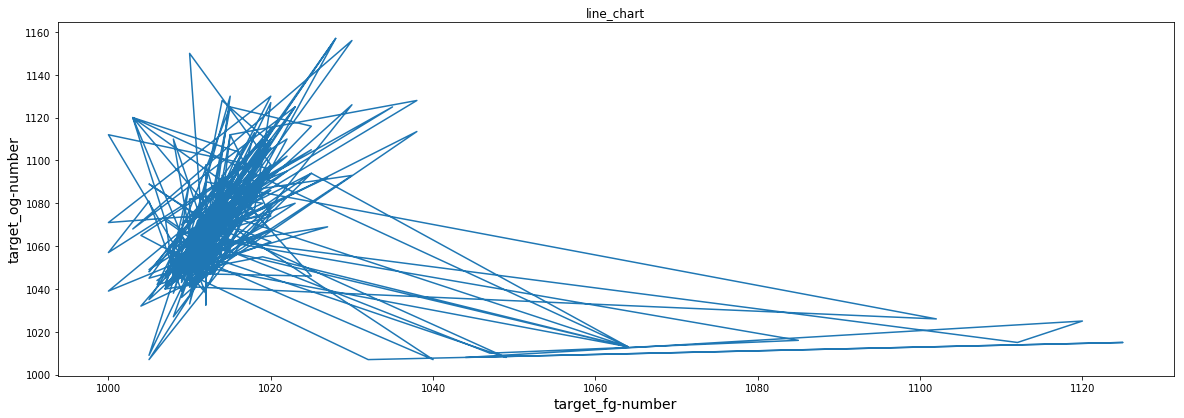

In [36]:
plt.figure(figsize=(20, 6.5))
plt.title("id", fontsize=24)
plt.xlabel(u"x", fontsize=14)
plt.ylabel(u"y", fontsize=14)
# x = range(1,len(num_list1)+1)
y1 = num_list1
y2 = num_list2
plt.plot(y1, y2)   
plt.ylabel("number")
# plt.xticks([index + 0.2 for index in x], x_list)
plt.ylabel("target_og-number")
# plt.xticks([index + 0.2 for index in x], x_list)
plt.xlabel("target_fg-number")
plt.title("line_chart")
# plt.legend()     
plt.show()


* <font color=black size=3>Line chart: The following is to do a linear regression. 

In [37]:
label=[]
all_data=[]
for x in range(len(num_list1)):
    onedata=[simplified_data['abv'][x],
             simplified_data['ibu'][x],simplified_data['ebc'][x],
             simplified_data['srm'][x],simplified_data['ph'][x]]
    all_data.append(onedata)
    label.append(simplified_data['attenuation_level'][x])
train_data=all_data[0:280]
train_label=label[0:280]
test_data=all_data[281:320]
test_label=label[281:320]

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
train_data=np.array(train_data)
train_label=np.array(train_label)
tset_data=np.array(test_data)
test_label=np.array(test_label)
print(test_label)

[87. 72. 86. 77. 83. 77. 84. 44. 82. 86. 86. 86. 83. 86. 82. 82. 70. 84.
 75. 86. 84. 78. 82. 77. 77. 85. 83. 86. 81. 87. 84. 83. 86.]


Fitting parameter: intercept 70.74817474239397 ,Regression coefficient： [ 0.95066018 -0.01586201 -0.08902833  0.13675425  1.05828245]


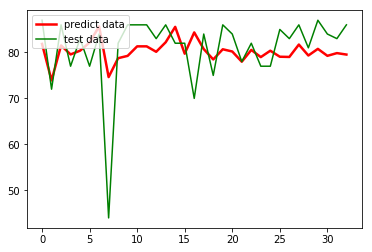

In [39]:
model = LinearRegression() # Define a model using the sklearn library
model.fit(train_data, train_label)  # Linear regression training
a = model.intercept_  # intercept
b = model.coef_  # Regression coefficient
print("Fitting parameter: intercept", a, ",Regression coefficient：", b)
Y_pred = model.predict(test_data) # Predict the test set
Y_pred=Y_pred
testlabel=test_label # Visualize 200 test results
plt.plot(range(len(Y_pred)), Y_pred, 'red', linewidth=2.5, label="predict data")
plt.plot(range(len(test_label)), test_label, 'green', label="test data")
plt.legend(loc=2)
plt.show()  # Show the curve of predicted value and tested value.

* <font color=black size=3>Radar map：Plot a feature analysis radar chart, segment according to the ph value, and then draw the feature size of each class separately, and take the average here.
    
    The following figure depicts the effect of ph values ​​on abv, ibu, ebc, srm and attenuation levels respectively. The purpose is also to improve the brewing level and find the best pH value.
    

In [40]:
labels = np.array(['abv', 'ibu', 'ebc', 'srm','attenuation_level'])
one_class_abv=one_class_ibu=one_class_ebc=one_class_srm=one_class_attenuation_level=[]
two_class_abv=two_class_ibu=two_class_ebc=two_class_srm=two_class_attenuation_level=[]
three_class_abv=three_class_ibu=three_class_ebc=three_class_srm=three_class_attenuation_level=[]

In [41]:
for x in range(len(num_list1)):
    if simplified_data['ph'][x]<=4.2:
        one_class_abv.append(simplified_data['abv'][x])
        one_class_ibu.append(simplified_data['ibu'][x])
        one_class_ebc.append(simplified_data['ebc'][x])
        one_class_srm.append(simplified_data['srm'][x])
        one_class_attenuation_level.append(simplified_data['attenuation_level'][x])
    elif simplified_data['ph'][x]>4.2 and simplified_data['ph'][x]<5 :
        two_class_abv.append(simplified_data['abv'][x])
        two_class_ibu.append(simplified_data['ibu'][x])
        two_class_ebc.append(simplified_data['ebc'][x])
        two_class_srm.append(simplified_data['srm'][x])
        two_class_attenuation_level.append(simplified_data['attenuation_level'][x])
    else :
        three_class_abv.append(simplified_data['abv'][x])
        three_class_ibu.append(simplified_data['ibu'][x])
        three_class_ebc.append(simplified_data['ebc'][x])
        three_class_srm.append(simplified_data['srm'][x])
        three_class_attenuation_level.append(simplified_data['attenuation_level'][x])

    

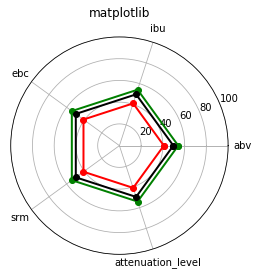

In [42]:
one=[np.mean(one_class_abv),np.mean(one_class_ibu),np.mean(one_class_ebc),np.mean(one_class_srm),
     np.mean(one_class_attenuation_level)]
two=[np.mean(two_class_abv),np.mean(two_class_ibu),np.mean(two_class_ebc),np.mean(two_class_srm),
     np.mean(two_class_attenuation_level)]
three=[np.mean(three_class_abv),np.mean(three_class_ibu),np.mean(three_class_ebc),np.mean(three_class_srm),
     np.mean(three_class_attenuation_level)]
one=np.array(one)
dataLenth=5
two=np.array(two)
three=np.array(three)
angles = np.linspace(0, 2 * np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Closed curve
one = np.concatenate((one, [one[0]]))  # Closed curve
two= np.concatenate((two, [two[0]]))  # Closed curve
three = np.concatenate((three, [three[0]]))  # Closed curve
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)  
ax.plot(angles, one, 'ro-', linewidth=2)  # Plot a line
ax.plot(angles, two, 'go-', linewidth=2)  # Plot a line
# ax.fill(angles, self.data_2, facecolor='g', alpha=0.25)  # Filling
ax.plot(angles, three, 'ko-', linewidth=2)  # Plot a line
# ax.fill(angles, self.data_3, facecolor='b', alpha=0.25)  # Filling
ax.set_thetagrids(angles * 180 / np.pi, labels )
ax.set_title("matplotlib", va='bottom')
ax.set_rlim(0, 100)
ax.grid(True)
plt.show()

<font color=black size=3>In general, the structure of this api is very clear, it is easier to get data and parsing data.